In [1]:
#for data manipulations
import pandas as pd
from pandas.api.types import CategoricalDtype

#for numerical calculations
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#for datetime manipulation
from datetime import timedelta
from datetime import datetime

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

In [2]:

#Machine learning library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

#### Installation

In [ ]:
!pip install pystan==2.17

In [ ]:
!pip install kats==0.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.5/612.5 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 72.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.3/950.3 KB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.9/347.9 KB 36.8 MB/s eta 0:00:00
     ━━━━━━

In [ ]:
!pip install kats

In [ ]:
!pip install lunarcalendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Data loading

In [3]:
path = "/content/drive/MyDrive/conrad assignement/train.csv"
path_pred = "/content/drive/MyDrive/conrad assignement/submission.csv"
df=pd.read_csv(path)
df_pred=pd.read_csv(path_pred)

df_pred=df_pred[["productsGroup_key","date_key","quantitySales"]]

In [4]:
df_pred

,productsGroup_key,date_key,quantitySales
0,1,20211128,0
1,1,20211129,0
2,1,20211130,0
3,1,20211201,0
4,1,20211202,0
...,...,...,...
8311,297,20211221,0
8312,297,20211222,0
8313,297,20211223,0
8314,297,20211224,0


###Data preprocessing

Checking null values

In [ ]:
df[df.isnull().any(axis=1)]

,productsGroup_key,date_key,quantitySales


Converting date column into the right type

In [5]:
df['date_key']=pd.to_datetime(df['date_key'], format='%Y%m%d')
df_pred['date_key']=pd.to_datetime(df_pred['date_key'], format='%Y%m%d')

Creating temporal features

In [6]:
df['year'] = pd.to_datetime(df['date_key']).dt.year
df['month'] = df['date_key'].dt.month
df['month_year'] = df['date_key'].dt.to_period('M')
df['day_of_week'] = df['date_key'].dt.dayofweek
day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_name)
df['quarter'] = df['date_key'].dt.quarter
df['weekofyear'] = df['date_key'].dt.weekofyear

In [7]:
df['day'] = df['date_key'].dt.day

In [8]:
df_pred['year'] = pd.to_datetime(df_pred['date_key']).dt.year
df_pred['month'] = df_pred['date_key'].dt.month
df_pred['month_year'] = df_pred['date_key'].dt.to_period('M')
df_pred['day_of_week'] = df_pred['date_key'].dt.dayofweek
df_pred['day_name'] = df_pred['day_of_week'].map(day_name)
df_pred['quarter'] = df_pred['date_key'].dt.quarter
df_pred['weekofyear'] = df_pred['date_key'].dt.weekofyear
df_pred['day'] = df_pred['date_key'].dt.day

In [ ]:
df

,productsGroup_key,date_key,quantitySales,year,month,month_year,day_of_week,day_name,quarter,weekofyear,day
0,1,2019-09-02,26784.0,2019,9,2019-09,0,Monday,3,36,2
1,1,2019-09-03,7432.0,2019,9,2019-09,1,Tuesday,3,36,3
2,1,2019-09-04,1424.0,2019,9,2019-09,2,Wednesday,3,36,4
3,1,2019-09-05,608.0,2019,9,2019-09,3,Thursday,3,36,5
4,1,2019-09-06,776.0,2019,9,2019-09,4,Friday,3,36,6
...,...,...,...,...,...,...,...,...,...,...,...
242395,297,2021-11-23,18.0,2021,11,2021-11,1,Tuesday,4,47,23
242396,297,2021-11-24,16.0,2021,11,2021-11,2,Wednesday,4,47,24
242397,297,2021-11-25,16.0,2021,11,2021-11,3,Thursday,4,47,25
242398,297,2021-11-26,16.0,2021,11,2021-11,4,Friday,4,47,26


In [ ]:
df1=df.set_index("date_key")

We now wish to remove the outliers of our data in order to have accurate prediction

In [ ]:
q1 = np.percentile(df.quantitySales, 25)
q2 = np.percentile(df.quantitySales, 50)
q3 = np.percentile(df.quantitySales, 75)

iqr = q3 - q1

# outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["quantitySales"] < lower_bound) | (df["quantitySales"] > upper_bound)]
print(outliers.head())
#df = df.drop(outliers.index)

#df = df[(df["quantitySales"] > lower_bound) & (df["quantitySales"] < upper_bound)]
len(outliers)

    productsGroup_key   date_key  quantitySales  year  month month_year  \
0                   1 2019-09-02        26784.0  2019      9    2019-09   
14                  1 2019-09-16        42040.0  2019      9    2019-09   
25                  1 2019-09-27        15048.0  2019      9    2019-09   
39                  1 2019-10-11        10528.0  2019     10    2019-10   
42                  1 2019-10-14        15656.0  2019     10    2019-10   

    day_of_week day_name  quarter  weekofyear  day  
0             0   Monday        3          36    2  
14            0   Monday        3          38   16  
25            4   Friday        3          39   27  
39            4   Friday        4          41   11  
42            0   Monday        4          42   14  


29560

in a previous version we conducted the analysis after ommitting the outliers but the results were poorer due to overfitting.

we can though add a feature that indicates to the model that a special event is occuring (thus there s an outlier) and represent this information as a feature

In [ ]:
df

,productsGroup_key,date_key,quantitySales,year,month,month_year,day_of_week,day_name,quarter,weekofyear,day
0,1,2019-09-02,26784.0,2019,9,2019-09,0,Monday,3,36,2
1,1,2019-09-03,7432.0,2019,9,2019-09,1,Tuesday,3,36,3
2,1,2019-09-04,1424.0,2019,9,2019-09,2,Wednesday,3,36,4
3,1,2019-09-05,608.0,2019,9,2019-09,3,Thursday,3,36,5
4,1,2019-09-06,776.0,2019,9,2019-09,4,Friday,3,36,6
...,...,...,...,...,...,...,...,...,...,...,...
242395,297,2021-11-23,18.0,2021,11,2021-11,1,Tuesday,4,47,23
242396,297,2021-11-24,16.0,2021,11,2021-11,2,Wednesday,4,47,24
242397,297,2021-11-25,16.0,2021,11,2021-11,3,Thursday,4,47,25
242398,297,2021-11-26,16.0,2021,11,2021-11,4,Friday,4,47,26


In [9]:
X=df[["productsGroup_key","quantitySales","year","month","day_of_week","day","quarter","weekofyear","date_key"]]
X_pred=df_pred[["productsGroup_key","quantitySales","year","month","day_of_week","day","quarter","weekofyear","date_key"]]

### Data analysis

In [ ]:
X.describe()

,productsGroup_key,quantitySales,year,month,day_of_week,day,quarter,weekofyear
count,212840.000000,212840.000000,212840.000000,212840.000000,212840.000000,212840.000000,212840.000000,212840.000000
mean,151.855835,1605.907672,2020.257475,6.891346,3.136516,15.705953,2.631709,28.250813
std,84.827632,1746.636235,0.698286,3.429286,2.026107,8.797085,1.120819,15.032132
min,1.000000,10.000000,2019.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,79.000000,300.000000,2020.000000,4.000000,1.000000,8.000000,2.000000,15.000000
50%,154.000000,980.000000,2020.000000,7.000000,3.000000,16.000000,3.000000,30.000000
75%,223.000000,2260.000000,2021.000000,10.000000,5.000000,23.000000,4.000000,41.000000
max,297.000000,7962.000000,2021.000000,12.000000,6.000000,31.000000,4.000000,53.000000


From the descriptive statistics about productsGroup_key we can see that the data is balanced and that the sales are collected at the same intervals.

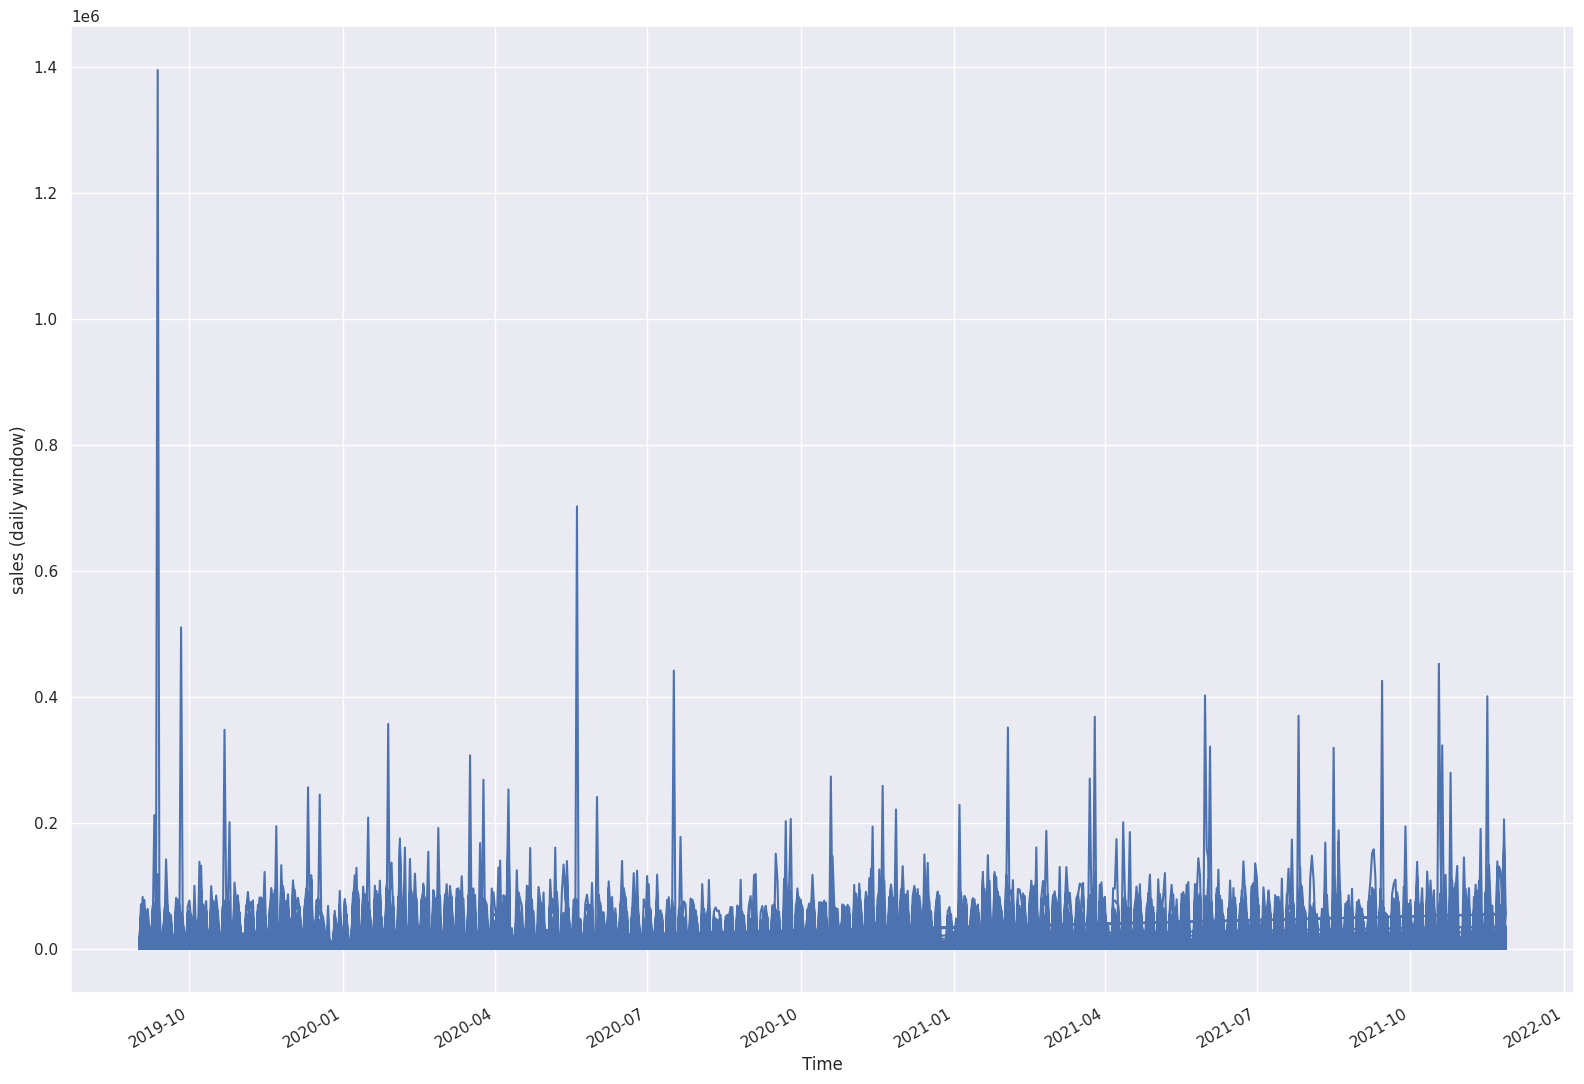

In [ ]:
fig, ax = plt.subplots(figsize=(16, 11))

ax.plot(df1.quantitySales)

ax.set_xlabel('Time')
ax.set_ylabel('sales (daily window)')
fig.autofmt_xdate()
plt.tight_layout()

#### Data scaling

In [10]:
from sklearn import preprocessing
import numpy as np

In [11]:
 
y=X.pop("quantitySales") 
y_pred=X_pred.pop("quantitySales")

In [12]:
X=X.set_index("date_key")

X_pred=X_pred.set_index("date_key")

In [13]:
# Fit the scaler
scaler = preprocessing.StandardScaler().fit(X)
#y_scaler = preprocessing.StandardScaler().fit(y.values)
y_scaler = preprocessing.StandardScaler().fit(np.array(y).reshape(-1, 1))

y_scaled=y_scaler.transform(np.array(y).reshape(-1, 1))
print(scaler.mean_)
print(scaler.scale_)

# Transform the data
X_scaled = scaler.transform(X)
X_scaled_pred = scaler.transform(X_pred)
X_scaled
X_df=pd.DataFrame(X_scaled,columns=["productsGroup_key","year","month","day_of_week","day","quarter","weekofyear"])
X_df["date_key"]=df["date_key"]
X_df=X_df.set_index("date_key")
X_df["quantitySales"]=y_scaled
X_df_pred=pd.DataFrame(X_scaled_pred,columns=["productsGroup_key","year","month","day_of_week","day","quarter","weekofyear"])

X_df_pred["date_key"]=df_pred["date_key"]
X_df_pred=X_df_pred.set_index("date_key")
X_df_pred["quantitySales"]=0

[ 148.68408828 2020.25687706    6.89051568    2.99954208   15.68530941
    2.63150578   28.25221535]
[85.6960135   0.69822983  3.43776193  1.99979057  8.77684662  1.1246158
 15.06094951]


### Training

In [ ]:
X_df

,productsGroup_key,quantitySales,year,month,day_of_week,day,quarter,weekofyear
date_key,,,,,,,,
2019-09-02,-1.723348,2.239030,-1.800091,0.613621,-1.499928,-1.559251,0.327662,0.514429
2019-09-03,-1.723348,0.334073,-1.800091,0.613621,-0.999876,-1.445315,0.327662,0.514429
2019-09-04,-1.723348,-0.257338,-1.800091,0.613621,-0.499823,-1.331379,0.327662,0.514429
2019-09-05,-1.723348,-0.337663,-1.800091,0.613621,0.000229,-1.217443,0.327662,0.514429
2019-09-06,-1.723348,-0.321125,-1.800091,0.613621,0.500281,-1.103507,0.327662,0.514429
...,...,...,...,...,...,...,...,...
2021-11-23,1.730721,-0.395740,1.064296,1.195395,-0.999876,0.833408,1.216855,1.244794
2021-11-24,1.730721,-0.395937,1.064296,1.195395,-0.499823,0.947344,1.216855,1.244794
2021-11-25,1.730721,-0.395937,1.064296,1.195395,0.000229,1.061280,1.216855,1.244794


In [ ]:
#X_df=X_df.sample(random_state=24,frac=1) 

In [14]:
X_train=X_df[:'2021-06-01']
X_test=X_df['2021-06-01':]
test = X_df['2021-06-01':]

In [15]:
y_train=X_train.pop("quantitySales")
y_test=X_test.pop("quantitySales")

In [ ]:
X_train

,productsGroup_key,year,month,day_of_week,day,quarter,weekofyear
date_key,,,,,,,
2019-09-02,-1.723348,-1.800091,0.613621,-1.499928,-1.559251,0.327662,0.514429
2019-09-03,-1.723348,-1.800091,0.613621,-0.999876,-1.445315,0.327662,0.514429
2019-09-04,-1.723348,-1.800091,0.613621,-0.499823,-1.331379,0.327662,0.514429
2019-09-05,-1.723348,-1.800091,0.613621,0.000229,-1.217443,0.327662,0.514429
2019-09-06,-1.723348,-1.800091,0.613621,0.500281,-1.103507,0.327662,0.514429
...,...,...,...,...,...,...,...
2021-05-28,1.730721,1.064296,-0.549926,0.500281,1.403088,-0.561530,-0.481524
2021-05-29,1.730721,1.064296,-0.549926,1.000334,1.517024,-0.561530,-0.481524
2021-05-30,1.730721,1.064296,-0.549926,1.500386,1.630961,-0.561530,-0.481524


#### Model Selection

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error
gbr = GradientBoostingRegressor(random_state=10,learning_rate=0.1,n_estimators=1000)
gbr.fit(X_train, y=y_train)
gbr_pred = gbr.predict(X_test) 

In [17]:
gbr.feature_names_in_

array(['productsGroup_key', 'year', 'month', 'day_of_week', 'day',
       'quarter', 'weekofyear'], dtype=object)

In [18]:
test["gbr"]=gbr_pred
test["y"]=y_test

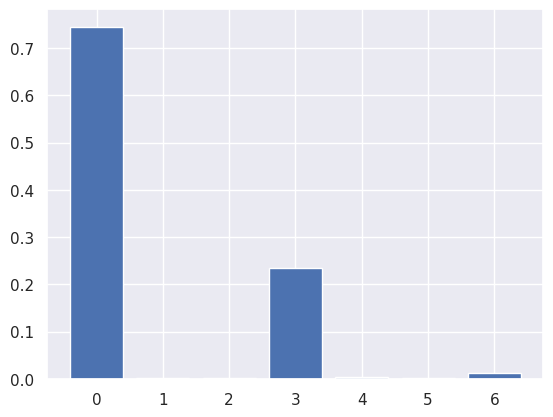

In [19]:

# plot
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

In [20]:
test

,productsGroup_key,year,month,day_of_week,day,quarter,weekofyear,quantitySales,gbr,y
date_key,,,,,,,,,,
2021-06-01,-1.723348,1.064296,-0.259039,-0.999876,-1.673187,-0.561530,-0.415128,-0.255763,0.155234,-0.255763
2021-06-02,-1.723348,1.064296,-0.259039,-0.499823,-1.559251,-0.561530,-0.415128,-0.188825,0.061864,-0.188825
2021-06-03,-1.723348,1.064296,-0.259039,0.000229,-1.445315,-0.561530,-0.415128,-0.366800,-0.006566,-0.366800
2021-06-04,-1.723348,1.064296,-0.259039,0.500281,-1.331379,-0.561530,-0.415128,-0.039201,-0.157197,-0.039201
2021-06-05,-1.723348,1.064296,-0.259039,1.000334,-1.217443,-0.561530,-0.415128,-0.338450,-0.336367,-0.338450
...,...,...,...,...,...,...,...,...,...,...
2021-11-23,1.730721,1.064296,1.195395,-0.999876,0.833408,1.216855,1.244794,-0.395740,0.024604,-0.395740
2021-11-24,1.730721,1.064296,1.195395,-0.499823,0.947344,1.216855,1.244794,-0.395937,-0.019128,-0.395937
2021-11-25,1.730721,1.064296,1.195395,0.000229,1.061280,1.216855,1.244794,-0.395937,0.023860,-0.395937


In [21]:
from sklearn.metrics import mean_squared_error
import math 
error_mse = mean_squared_error(
                y_true = y_test,
                y_pred = gbr_pred
            )

mae = mean_absolute_error( y_true = y_test,
                y_pred = gbr_pred)
print(f"Test error (mse): {error_mse}")
print(f"Test error (rmse): {math.sqrt(error_mse)}")
print(f"Test error (mae): {mae}")

Test error (mse): 0.4485433490040104
Test error (rmse): 0.6697337896537776
Test error (mae): 0.20840698087110385


In [24]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)
# Fit the model
dt_reg.fit(X=X_train, y=y_train)
# Make predictions
dt_pred = dt_reg.predict(X_test)
# Assign predictions to a new column in test
test['dt_pred'] = dt_pred

In [25]:
from sklearn.metrics import mean_squared_error
error_mse = mean_squared_error(
                y_true = y_test,
                y_pred = test["dt_pred"]
            )

print(f"Test error (mse): {error_mse}")
mae = mean_absolute_error(y_test, test["dt_pred"])

print(f"Test error (rmse): {math.sqrt(error_mse)}")
print('Test error (mae): %.3f' % mae)


Test error (mse): 0.9041644652178653
Test error (rmse): 0.9508756307834718
Test error (mae): 0.260


#### TS specialised libraries

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
X_test

,productsGroup_key,year,month,day_of_week,day,quarter,weekofyear
date_key,,,,,,,
2021-06-01,-1.778385,1.063356,0.614897,-1.054496,-0.989643,0.328592,0.515509
2021-06-02,-1.778385,1.063356,0.614897,0.426180,-0.648620,0.328592,0.515509
2021-06-03,-1.778385,1.063356,0.614897,0.919739,-0.534946,0.328592,0.515509
2021-06-04,-1.778385,1.063356,0.614897,1.413297,-0.421272,0.328592,0.515509
2021-06-05,-1.778385,1.063356,0.614897,-1.548054,-0.307597,0.328592,0.582034
...,...,...,...,...,...,...,...
2021-11-21,1.711052,-0.368725,-0.259922,-1.054496,0.829146,-0.563615,-0.149734
2021-11-22,1.711052,-0.368725,-0.259922,-0.560937,0.942820,-0.563615,-0.149734
2021-11-24,1.711052,-0.368725,-0.259922,0.426180,1.170168,-0.563615,-0.149734


In [ ]:
X_train['y']=y_train
X_test['y']=y_test

In [ ]:
X_train['y-shifted']=X_train["y"].shift(1).fillna(0)
X_test['y-shifted']=X_test["y"].shift(1).fillna(0)

In [ ]:
X_train=X_train.reset_index()
X_test=X_test.reset_index()

In [ ]:
X_train = X_train.rename(columns={'date_key': 'ds'})
X_test = X_test.rename(columns={'date_key': 'ds'})

In [ ]:
model = Prophet(interval_width=0.95)
model.add_regressor('productsGroup_key', standardize=False)
model.add_regressor("y-shifted", standardize=False)
model.add_regressor('day_of_week', standardize=False)
model.add_regressor('quarter', standardize=False)
model.add_regressor('weekofyear', standardize=False)
model.fit(X_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp890181gx/ssamb2db.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp890181gx/_o1eypsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17859', 'data', 'file=/tmp/tmp890181gx/ssamb2db.json', 'init=/tmp/tmp890181gx/_o1eypsh.json', 'output', 'file=/tmp/tmp890181gx/prophet_model6_j6ng4k/prophet_model-20230403115445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:54:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:55:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# use the model to make a forecast
forecast = model.predict(X_test)

          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.154669   -1.372818    1.857707
1 2021-06-01 -0.023622   -1.687312    1.507117
2 2021-06-01  0.598079   -1.020816    2.259106
3 2021-06-01 -0.100576   -1.772830    1.497948
4 2021-06-01  0.027761   -1.566914    1.653065


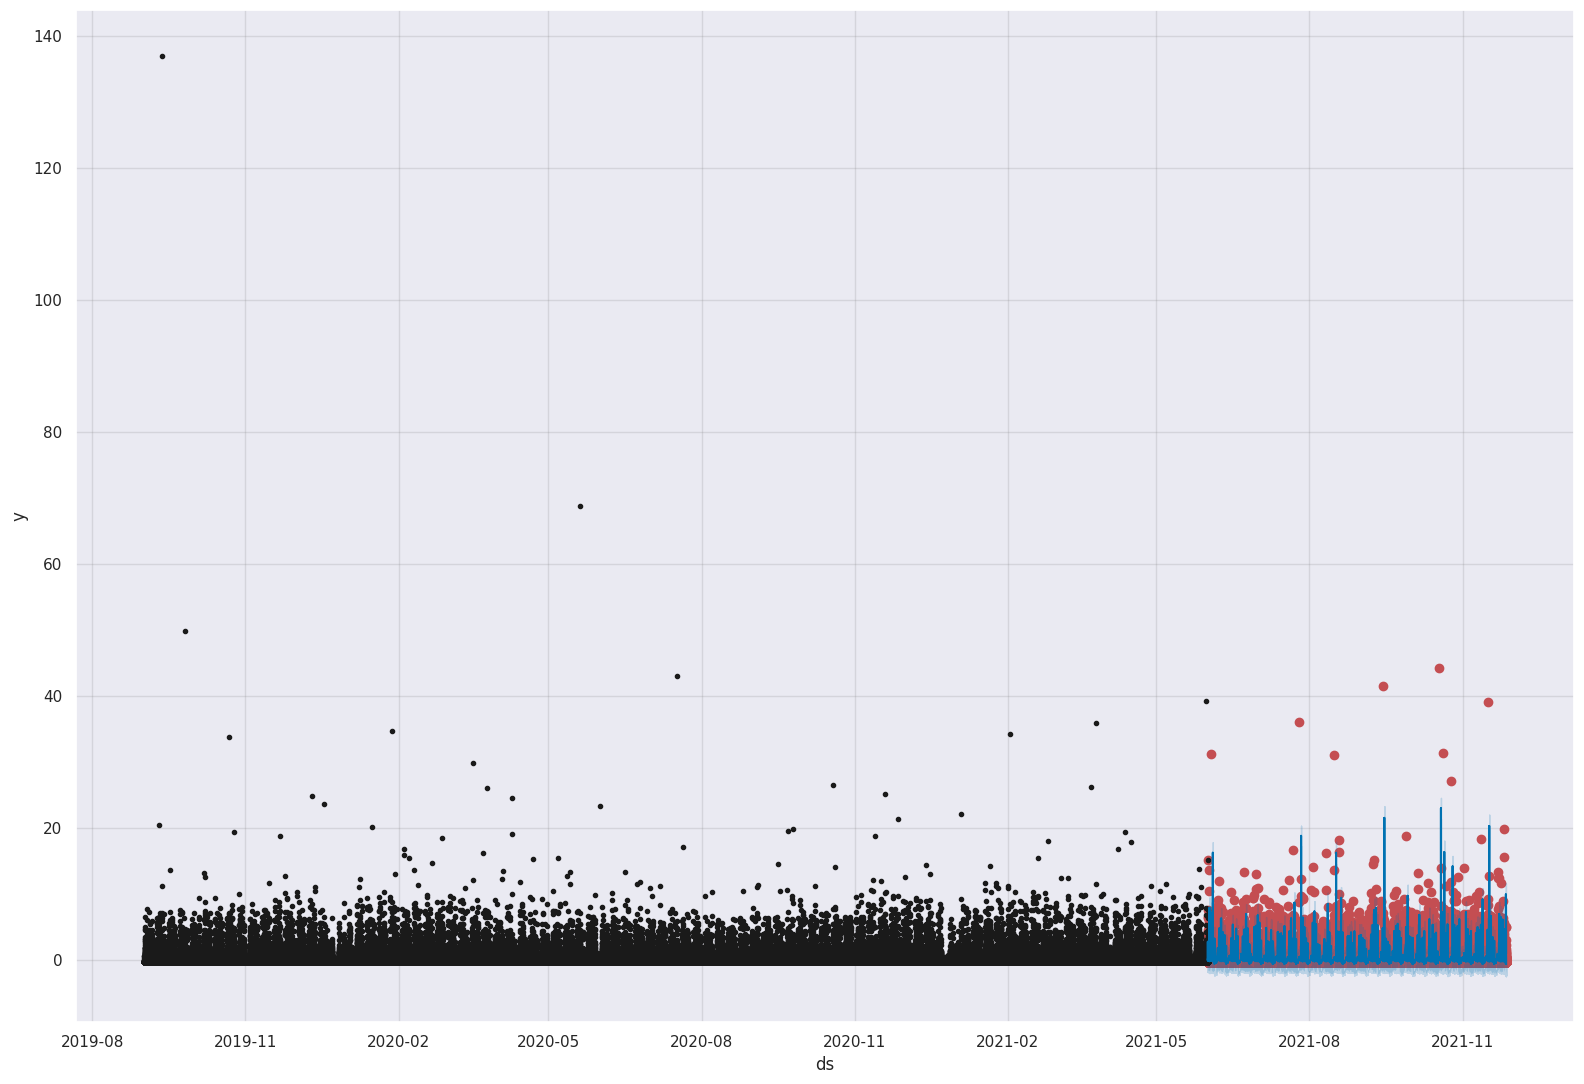

In [ ]:
fig, ax = plt.subplots(figsize=(16, 11))

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast

ax.scatter(X_test.ds, X_test['y'], color='r')
fig = model.plot(forecast, ax=ax)
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,day_of_week,...,weekofyear,weekofyear_lower,weekofyear_upper,y-shifted,y-shifted_lower,y-shifted_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-01,-0.025038,-1.688582,1.526031,-0.025038,-0.025038,0.073150,0.073150,0.073150,-0.000027,...,-0.002728,-0.002728,-0.002728,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.048113
1,2021-07-01,-0.025038,-1.823832,1.601062,-0.025038,-0.025038,-0.105765,-0.105765,-0.105765,-0.000027,...,-0.002728,-0.002728,-0.002728,-0.122057,-0.122057,-0.122057,0.0,0.0,0.0,-0.130803
2,2021-07-01,-0.025038,-1.107204,2.102135,-0.025038,-0.025038,0.518216,0.518216,0.518216,-0.000027,...,-0.002728,-0.002728,-0.002728,0.456300,0.456300,0.456300,0.0,0.0,0.0,0.493179
3,2021-07-01,-0.025038,-1.891022,1.546313,-0.025038,-0.025038,-0.183005,-0.183005,-0.183005,-0.000027,...,-0.002728,-0.002728,-0.002728,-0.199527,-0.199527,-0.199527,0.0,0.0,0.0,-0.208043
4,2021-07-01,-0.025038,-1.659843,1.409965,-0.025038,-0.025038,-0.054222,-0.054222,-0.054222,-0.000027,...,-0.002728,-0.002728,-0.002728,-0.115909,-0.115909,-0.115909,0.0,0.0,0.0,-0.079259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,2021-11-27,-0.003675,-2.228297,1.154980,-0.496250,0.450665,-0.548172,-0.548172,-0.548172,-0.118359,...,0.022705,0.022705,0.022705,-0.156949,-0.156949,-0.156949,0.0,0.0,0.0,-0.551848
44546,2021-11-27,-0.003675,-2.027910,1.361746,-0.496265,0.450676,-0.296953,-0.296953,-0.296953,-0.118359,...,0.022705,0.022705,0.022705,0.077304,0.077304,0.077304,0.0,0.0,0.0,-0.300629
44547,2021-11-27,-0.003675,-1.521272,1.586050,-0.496280,0.450687,0.033551,0.033551,0.033551,-0.118359,...,0.022705,0.022705,0.022705,0.471773,0.471773,0.471773,0.0,0.0,0.0,0.029875
44548,2021-11-27,-0.003675,-2.137202,1.215871,-0.496295,0.450698,-0.471003,-0.471003,-0.471003,-0.118359,...,0.022705,0.022705,0.022705,-0.064877,-0.064877,-0.064877,0.0,0.0,0.0,-0.474678


In [ ]:


y_true = test['y'].values
y_pred = forecast['yhat'].values
error_mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print('Test error (rmse): %.3f' % error_mse)

print("Test error (rmse): %.3f "%math.sqrt(error_mse))
print('Test error (mae): %.3f' % mae)

Test error (rmse): 1.388
Test error (rmse): 1.178 
Test error (mae): 0.542


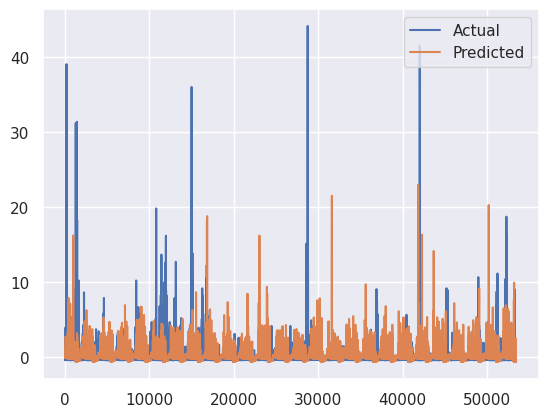

In [ ]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

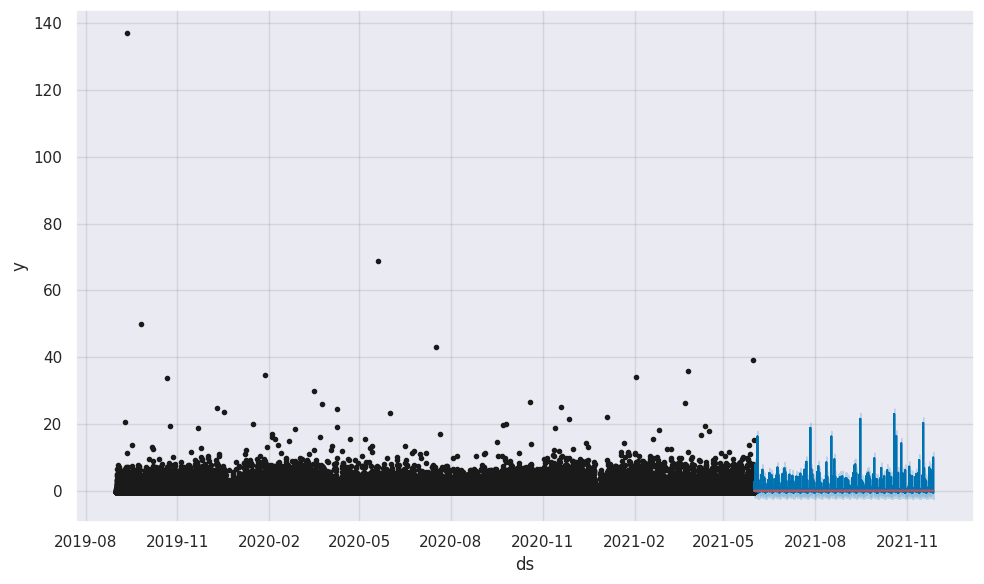

In [ ]:
# Python
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)


At first , without using the time lag the performance of this model was very limited. Worse than the standard regression libraries who are simplified libraries that dont capture seasonalities and long term trends. Adding the historical time window improved the prediction significatly.

Hyper parameter tuning with gridsearch 

In [ ]:

from sklearn.model_selection import ParameterGrid
params_grid = {
    #'seasonality_mode':('multiplicative','additive'),
    
               'changepoint_prior_scale':[0.001, 0.01,0.1,0.5],
               
    'seasonality_prior_scale': [0.01, 0.1, 1.0], 
              'n_changepoints' : [
                  #10,
                  30,100,200]}
grid = ParameterGrid(params_grid)



In [ ]:
test

""


In [ ]:
model_parameters = pd.DataFrame(columns = ['MSE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p) 
    np.random.seed(1000)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = 'multiplicative',
                         seasonality_prior_scale=p['seasonality_prior_scale'],
                         weekly_seasonality=True,
                         daily_seasonality = False,
                         yearly_seasonality = False,
                         interval_width=0.95)
    
    train_model.add_regressor('productsGroup_key', standardize=False)
    train_model.add_regressor("y-shifted", standardize=False)
    train_model.add_regressor('day_of_week', standardize=False)
    train_model.add_regressor('quarter', standardize=False)
    train_model.add_regressor('weekofyear', standardize=False)
    train_model.fit(X_train)
    # use the model to make a forecast
    forecast = train_model.predict(X_test)
    # summarize the forecast
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
    #train_forecast = train_model.make_future_dataframe(periods=57, freq='D',include_history = False)
    #train_forecast = train_model.predict(train_forecast)
    
    y_true = X_test['y'].values
    y_pred = forecast['yhat'].values
    error_mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print('Test error (mse): %.3f' % error_mse)

    print("Test error (rmse): %.3f "%math.sqrt(error_mse))
    print('Test error (mae): %.3f' % mae) 
    model_parameters = model_parameters.append({'MSE':error_mse,'changepoint_prior_scale':p['changepoint_prior_scale'],'n_changepoints':p['n_changepoints'],'seasonality_prior_scale':p['seasonality_prior_scale']},ignore_index=True)

{'changepoint_prior_scale': 0.001, 'n_changepoints': 30, 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/sgr_xaa6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/2nau0_8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90017', 'data', 'file=/tmp/tmpqsnwnb1r/sgr_xaa6.json', 'init=/tmp/tmpqsnwnb1r/2nau0_8h.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modeltbdjdz7y/prophet_model-20230401122643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01 -0.014650   -1.964988    2.233534
1 2021-06-01 -0.014644   -2.048313    1.817132
2 2021-06-01 -0.014670   -2.090943    1.875745
3 2021-06-01 -0.014641   -1.925436    1.927690
4 2021-06-01 -0.014645   -2.003088    1.971283
Test error (mse): 1.037
Test error (rmse): 1.018 
Test error (mae): 0.440
{'changepoint_prior_scale': 0.001, 'n_changepoints': 30, 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/rm3ua7i2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/is29_5gv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98652', 'data', 'file=/tmp/tmpqsnwnb1r/rm3ua7i2.json', 'init=/tmp/tmpqsnwnb1r/is29_5gv.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_model8pgwem35/prophet_model-20230401122711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:27:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:27:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01 -0.012146   -1.966265    2.240396
1 2021-06-01 -0.012128   -2.049740    1.823199
2 2021-06-01 -0.012197   -2.092495    1.881882
3 2021-06-01 -0.012120   -1.926619    1.933976
4 2021-06-01 -0.012132   -2.004430    1.977646
Test error (mse): 1.037
Test error (rmse): 1.018 
Test error (mae): 0.442
{'changepoint_prior_scale': 0.001, 'n_changepoints': 30, 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/cycd8c17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/xa_j03ni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48334', 'data', 'file=/tmp/tmpqsnwnb1r/cycd8c17.json', 'init=/tmp/tmpqsnwnb1r/xa_j03ni.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_model122u690m/prophet_model-20230401122756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:27:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.338731   -1.307652    2.236543
1 2021-06-01  0.161423   -1.555305    1.707723
2 2021-06-01  0.778496   -0.974196    2.374295
3 2021-06-01  0.085089   -1.527915    1.724713
4 2021-06-01  0.212751   -1.465799    1.889179
Test error (mse): 1.354
Test error (rmse): 1.163 
Test error (mae): 0.606
{'changepoint_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/9eywg691.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/di9hk5gx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86023', 'data', 'file=/tmp/tmpqsnwnb1r/9eywg691.json', 'init=/tmp/tmpqsnwnb1r/di9hk5gx.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modeluk41xuu2/prophet_model-20230401123210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01 -0.012518   -1.965577    2.238803
1 2021-06-01 -0.012513   -2.049019    1.821819
2 2021-06-01 -0.012535   -2.091704    1.880518
3 2021-06-01 -0.012510   -1.925971    1.932531
4 2021-06-01 -0.012514   -2.003731    1.976186
Test error (mse): 1.037
Test error (rmse): 1.018 
Test error (mae): 0.444
{'changepoint_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/3xyg0fxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/up8dc7ut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96066', 'data', 'file=/tmp/tmpqsnwnb1r/3xyg0fxy.json', 'init=/tmp/tmpqsnwnb1r/up8dc7ut.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_model6fgrobcg/prophet_model-20230401123310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01 -0.011754   -1.964932    2.239703
1 2021-06-01 -0.011747   -2.048377    1.822696
2 2021-06-01 -0.011776   -2.091072    1.881391
3 2021-06-01 -0.011743   -1.925321    1.933415
4 2021-06-01 -0.011748   -2.003086    1.977071
Test error (mse): 1.037
Test error (rmse): 1.018 
Test error (mae): 0.444
{'changepoint_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/iq0ea428.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/ugzhko06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90630', 'data', 'file=/tmp/tmpqsnwnb1r/iq0ea428.json', 'init=/tmp/tmpqsnwnb1r/ugzhko06.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelq9uf6pji/prophet_model-20230401123419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01 -0.013015   -1.965590    2.237748
1 2021-06-01 -0.013009   -2.049011    1.820868
2 2021-06-01 -0.013033   -2.091688    1.879550
3 2021-06-01 -0.013006   -1.925994    1.931552
4 2021-06-01 -0.013010   -2.003734    1.975196
Test error (mse): 1.037
Test error (rmse): 1.018 
Test error (mae): 0.443
{'changepoint_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/xi73_sct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/ugnkpcb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48180', 'data', 'file=/tmp/tmpqsnwnb1r/xi73_sct.json', 'init=/tmp/tmpqsnwnb1r/ugnkpcb0.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelty_8oooz/prophet_model-20230401123522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01 -0.013065   -1.965501    2.237536
1 2021-06-01 -0.013062   -2.048918    1.820685
2 2021-06-01 -0.013077   -2.091583    1.879370
3 2021-06-01 -0.013059   -1.925910    1.931360
4 2021-06-01 -0.013062   -2.003643    1.975002
Test error (mse): 1.037
Test error (rmse): 1.018 
Test error (mae): 0.443
{'changepoint_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/0gum3ezg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/r87thmbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27586', 'data', 'file=/tmp/tmpqsnwnb1r/0gum3ezg.json', 'init=/tmp/tmpqsnwnb1r/r87thmbi.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_model7cgfhwrz/prophet_model-20230401123734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01 -0.013778   -1.965100    2.235541
1 2021-06-01 -0.013775   -2.048470    1.818925
2 2021-06-01 -0.013787   -2.091107    1.877582
3 2021-06-01 -0.013774   -1.925533    1.929537
4 2021-06-01 -0.013776   -2.003222    1.973155
Test error (mse): 1.037
Test error (rmse): 1.018 
Test error (mae): 0.442
{'changepoint_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/6t6x1cpo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/_em94fju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95191', 'data', 'file=/tmp/tmpqsnwnb1r/6t6x1cpo.json', 'init=/tmp/tmpqsnwnb1r/_em94fju.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_model4dmxzsz6/prophet_model-20230401123859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:38:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01 -0.013206   -1.967269    2.239271
1 2021-06-01 -0.013204   -2.050757    1.822070
2 2021-06-01 -0.013214   -2.093452    1.880810
3 2021-06-01 -0.013203   -1.927647    1.932837
4 2021-06-01 -0.013204   -2.005444    1.976516
Test error (mse): 1.037
Test error (rmse): 1.018 
Test error (mae): 0.443
{'changepoint_prior_scale': 0.01, 'n_changepoints': 30, 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/5s2xy025.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/412h887p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32225', 'data', 'file=/tmp/tmpqsnwnb1r/5s2xy025.json', 'init=/tmp/tmpqsnwnb1r/412h887p.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelyboiuo8r/prophet_model-20230401124029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:43:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.350034   -1.307076    2.260211
1 2021-06-01  0.177220   -1.550694    1.733594
2 2021-06-01  0.783330   -0.980782    2.389526
3 2021-06-01  0.102060   -1.521453    1.752368
4 2021-06-01  0.226358   -1.463128    1.913708
Test error (mse): 1.325
Test error (rmse): 1.151 
Test error (mae): 0.608
{'changepoint_prior_scale': 0.01, 'n_changepoints': 30, 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/1e7gld94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/e8pzqp2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8614', 'data', 'file=/tmp/tmpqsnwnb1r/1e7gld94.json', 'init=/tmp/tmpqsnwnb1r/e8pzqp2e.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_model_53rzog7/prophet_model-20230401124315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.323829   -1.320936    2.219774
1 2021-06-01  0.149955   -1.565085    1.694735
2 2021-06-01  0.763889   -0.987080    2.358119
3 2021-06-01  0.073669   -1.537749    1.711681
4 2021-06-01  0.198614   -1.478286    1.873393
Test error (mse): 1.332
Test error (rmse): 1.154 
Test error (mae): 0.602
{'changepoint_prior_scale': 0.01, 'n_changepoints': 30, 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/q8zw0btw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/qo_htnub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43163', 'data', 'file=/tmp/tmpqsnwnb1r/q8zw0btw.json', 'init=/tmp/tmpqsnwnb1r/qo_htnub.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelyhi8u7j2/prophet_model-20230401124649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.313011   -1.324273    2.200333
1 2021-06-01  0.140281   -1.566958    1.678034
2 2021-06-01  0.759561   -0.983443    2.346541
3 2021-06-01  0.062974   -1.541115    1.693535
4 2021-06-01  0.186836   -1.482436    1.853998
Test error (mse): 1.348
Test error (rmse): 1.161 
Test error (mae): 0.588
{'changepoint_prior_scale': 0.01, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/7qw4tnjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/8r2uih6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19450', 'data', 'file=/tmp/tmpqsnwnb1r/7qw4tnjt.json', 'init=/tmp/tmpqsnwnb1r/8r2uih6p.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelouso6oet/prophet_model-20230401125020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:59:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.342883   -1.300323    2.237030
1 2021-06-01  0.167008   -1.546406    1.710322
2 2021-06-01  0.785057   -0.964252    2.377775
3 2021-06-01  0.090322   -1.519567    1.726781
4 2021-06-01  0.216787   -1.458522    1.889978
Test error (mse): 1.338
Test error (rmse): 1.157 
Test error (mae): 0.596
{'changepoint_prior_scale': 0.01, 'n_changepoints': 100, 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/2_t07iep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/ys07fag5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50062', 'data', 'file=/tmp/tmpqsnwnb1r/2_t07iep.json', 'init=/tmp/tmpqsnwnb1r/ys07fag5.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelfye8wb63/prophet_model-20230401125923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.332866   -1.302667    2.218170
1 2021-06-01  0.156808   -1.548606    1.692917
2 2021-06-01  0.775460   -0.965681    2.360742
3 2021-06-01  0.080049   -1.522324    1.708868
4 2021-06-01  0.206647   -1.460840    1.872026
Test error (mse): 1.351
Test error (rmse): 1.162 
Test error (mae): 0.608
{'changepoint_prior_scale': 0.01, 'n_changepoints': 100, 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/gapijqg5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/evjobxe3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36453', 'data', 'file=/tmp/tmpqsnwnb1r/gapijqg5.json', 'init=/tmp/tmpqsnwnb1r/evjobxe3.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelibw7d1s4/prophet_model-20230401131101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:20:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.345186   -1.305124    2.247523
1 2021-06-01  0.168017   -1.552804    1.718004
2 2021-06-01  0.784928   -0.971944    2.384533
3 2021-06-01  0.091690   -1.525160    1.735225
4 2021-06-01  0.219243   -1.463309    1.899669
Test error (mse): 1.360
Test error (rmse): 1.166 
Test error (mae): 0.620
{'changepoint_prior_scale': 0.01, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/3oruufhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/fmqpwg5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52363', 'data', 'file=/tmp/tmpqsnwnb1r/3oruufhy.json', 'init=/tmp/tmpqsnwnb1r/fmqpwg5g.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_model2ztvkkzc/prophet_model-20230401132050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:20:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:41:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.367607   -1.291964    2.280620
1 2021-06-01  0.190204   -1.540275    1.748889
2 2021-06-01  0.801777   -0.964954    2.410359
3 2021-06-01  0.114774   -1.511150    1.767532
4 2021-06-01  0.242667   -1.449328    1.932523
Test error (mse): 1.348
Test error (rmse): 1.161 
Test error (mae): 0.632
{'changepoint_prior_scale': 0.01, 'n_changepoints': 200, 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/2618yl0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/tfbqyouj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29651', 'data', 'file=/tmp/tmpqsnwnb1r/2618yl0_.json', 'init=/tmp/tmpqsnwnb1r/tfbqyouj.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelncxsseh4/prophet_model-20230401134155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:41:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.380094   -1.294356    2.310258
1 2021-06-01  0.207843   -1.538151    1.780502
2 2021-06-01  0.785567   -0.997003    2.408570
3 2021-06-01  0.137215   -1.503286    1.804790
4 2021-06-01  0.261840   -1.445324    1.966846
Test error (mse): 1.288
Test error (rmse): 1.135 
Test error (mae): 0.640
{'changepoint_prior_scale': 0.01, 'n_changepoints': 200, 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/pppbhqi_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/ofuwupnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23496', 'data', 'file=/tmp/tmpqsnwnb1r/pppbhqi_.json', 'init=/tmp/tmpqsnwnb1r/ofuwupnz.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelt_tott6d/prophet_model-20230401135328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.316267   -1.311113    2.192172
1 2021-06-01  0.140004   -1.556908    1.668455
2 2021-06-01  0.770965   -0.961496    2.348344
3 2021-06-01  0.061275   -1.533110    1.681974
4 2021-06-01  0.187699   -1.471476    1.844776
Test error (mse): 1.365
Test error (rmse): 1.168 
Test error (mae): 0.614
{'changepoint_prior_scale': 0.1, 'n_changepoints': 30, 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/gs76_7i8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/ha_f296v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58670', 'data', 'file=/tmp/tmpqsnwnb1r/gs76_7i8.json', 'init=/tmp/tmpqsnwnb1r/ha_f296v.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelgriz1kne/prophet_model-20230401141101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.347310   -1.304177    2.251005
1 2021-06-01  0.173589   -1.548461    1.724682
2 2021-06-01  0.781873   -0.976253    2.382619
3 2021-06-01  0.098199   -1.519805    1.742906
4 2021-06-01  0.223177   -1.460577    1.904801
Test error (mse): 1.321
Test error (rmse): 1.149 
Test error (mae): 0.601
{'changepoint_prior_scale': 0.1, 'n_changepoints': 30, 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/yt_nslsp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/mjod77uy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48990', 'data', 'file=/tmp/tmpqsnwnb1r/yt_nslsp.json', 'init=/tmp/tmpqsnwnb1r/mjod77uy.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelzl19qcsk/prophet_model-20230401141453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.328692   -1.314780    2.223146
1 2021-06-01  0.155800   -1.557892    1.699364
2 2021-06-01  0.764265   -0.985327    2.357241
3 2021-06-01  0.080269   -1.529882    1.716993
4 2021-06-01  0.204564   -1.471016    1.878026
Test error (mse): 1.330
Test error (rmse): 1.153 
Test error (mae): 0.593
{'changepoint_prior_scale': 0.1, 'n_changepoints': 30, 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/idj01oh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/agr7cgrt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25799', 'data', 'file=/tmp/tmpqsnwnb1r/idj01oh0.json', 'init=/tmp/tmpqsnwnb1r/agr7cgrt.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelhbqe1bot/prophet_model-20230401141929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.300866   -1.327054    2.177395
1 2021-06-01  0.121513   -1.575963    1.650472
2 2021-06-01  0.760729   -0.972307    2.338633
3 2021-06-01  0.041859   -1.553056    1.663096
4 2021-06-01  0.170577   -1.489149    1.828204
Test error (mse): 1.364
Test error (rmse): 1.168 
Test error (mae): 0.610
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/fdt4smc3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/p0ar7ez_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95441', 'data', 'file=/tmp/tmpqsnwnb1r/fdt4smc3.json', 'init=/tmp/tmpqsnwnb1r/p0ar7ez_.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelian408ee/prophet_model-20230401142254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.314096   -1.321201    2.199127
1 2021-06-01  0.147296   -1.557871    1.683182
2 2021-06-01  0.765050   -0.975839    2.350102
3 2021-06-01  0.069440   -1.532702    1.698023
4 2021-06-01  0.188502   -1.478744    1.853640
Test error (mse): 1.328
Test error (rmse): 1.152 
Test error (mae): 0.588
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/ggarzi5x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/a3z64su8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73248', 'data', 'file=/tmp/tmpqsnwnb1r/ggarzi5x.json', 'init=/tmp/tmpqsnwnb1r/a3z64su8.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelo931ltb0/prophet_model-20230401143344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.344947   -1.301549    2.242889
1 2021-06-01  0.169633   -1.547213    1.716039
2 2021-06-01  0.779962   -0.972850    2.375871
3 2021-06-01  0.094125   -1.518989    1.733862
4 2021-06-01  0.220347   -1.458319    1.896889
Test error (mse): 1.340
Test error (rmse): 1.158 
Test error (mae): 0.614
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/j7zcol4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/w3holtdn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28574', 'data', 'file=/tmp/tmpqsnwnb1r/j7zcol4o.json', 'init=/tmp/tmpqsnwnb1r/w3holtdn.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modeld56a1vdb/prophet_model-20230401144408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.355768   -1.298473    2.262637
1 2021-06-01  0.177378   -1.547544    1.731057
2 2021-06-01  0.792878   -0.968179    2.396294
3 2021-06-01  0.101443   -1.519259    1.748893
4 2021-06-01  0.230034   -1.456528    1.914462
Test error (mse): 1.363
Test error (rmse): 1.167 
Test error (mae): 0.628
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/8gz5cz0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/92kqsnf0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81617', 'data', 'file=/tmp/tmpqsnwnb1r/8gz5cz0v.json', 'init=/tmp/tmpqsnwnb1r/92kqsnf0.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modelusb4709e/prophet_model-20230401145328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:12:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01  0.351403   -1.298786    2.253601
1 2021-06-01  0.177443   -1.543253    1.727316
2 2021-06-01  0.787029   -0.969714    2.386516
3 2021-06-01  0.101874   -1.514858    1.745288
4 2021-06-01  0.227010   -1.455419    1.907312
Test error (mse): 1.332
Test error (rmse): 1.154 
Test error (mae): 0.619
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/25dn88iu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/9xt6z7ix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54544', 'data', 'file=/tmp/tmpqsnwnb1r/25dn88iu.json', 'init=/tmp/tmpqsnwnb1r/9xt6z7ix.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_model7g8oltjb/prophet_model-20230401151320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


In [ ]:
model_parameters

,MSE,Parameters
0,1.036957,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
1,1.036790,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
2,1.353612,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
3,1.036795,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
4,1.036753,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
5,1.036825,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
6,1.036827,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
7,1.036873,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
8,1.036835,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
9,1.324990,"{'changepoint_prior_scale': 0.01, 'n_changepoi..."


In [ ]:
parameters = model_parameters.sort_values(by=['MSE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MSE,Parameters
0,1.036753,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
1,1.036790,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
2,1.036795,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
3,1.036825,"{'changepoint_prior_scale': 0.001, 'n_changepo..."
4,1.036827,"{'changepoint_prior_scale': 0.001, 'n_changepo..."


In [ ]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.001,
 'n_changepoints': 100,
 'seasonality_prior_scale': 0.1}

In [ ]:
parameters['Parameters'][0]["changepoint_prior_scale"]

0.001

In [ ]:

final_model = Prophet(
                      changepoint_prior_scale= 0.01,
                      seasonality_prior_scale = 0.01,
                      n_changepoints = 30,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = False,
                      yearly_seasonality = False,
                      interval_width=0.95)
final_model.add_regressor('productsGroup_key', standardize=False)
final_model.add_regressor("y-shifted", standardize=False)
final_model.add_regressor('day_of_week', standardize=False)
final_model.add_regressor('quarter', standardize=False)
final_model.add_regressor('weekofyear', standardize=False)
final_model.fit(X_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/gz3ff9rk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsnwnb1r/u9qz9xxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78456', 'data', 'file=/tmp/tmpqsnwnb1r/gz3ff9rk.json', 'init=/tmp/tmpqsnwnb1r/u9qz9xxn.json', 'output', 'file=/tmp/tmpqsnwnb1r/prophet_modela79y99zs/prophet_model-20230401122349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# use the model to make a forecast
forecast = final_model.predict(X_test)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
y_true = X_test['y'].values
y_pred = forecast['yhat'].values
error_mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print('Test error (mse): %.3f' % error_mse)
print("Test error (rmse): %.3f "%math.sqrt(error_mse))
print('Test error (mae): %.3f' % mae) 

          ds      yhat  yhat_lower  yhat_upper
0 2021-06-01 -0.011754   -1.964932    2.239703
1 2021-06-01 -0.011747   -2.048377    1.822696
2 2021-06-01 -0.011776   -2.091072    1.881391
3 2021-06-01 -0.011743   -1.925321    1.933415
4 2021-06-01 -0.011748   -2.003086    1.977071
Test error (mse): 1.037
Test error (rmse): 1.018 
Test error (mae): 0.444


In [ ]:
forecast.T

,0,1,2,3,4,5,6,7,8,9,...,53450,53451,53452,53453,53454,53455,53456,53457,53458,53459
ds,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,...,2021-11-27 00:00:00,2021-11-27 00:00:00,2021-11-27 00:00:00,2021-11-27 00:00:00,2021-11-27 00:00:00,2021-11-27 00:00:00,2021-11-27 00:00:00,2021-11-27 00:00:00,2021-11-27 00:00:00,2021-11-27 00:00:00
trend,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,...,-0.035506,-0.035506,-0.035506,-0.035506,-0.035506,-0.035506,-0.035506,-0.035506,-0.035506,-0.035506
yhat_lower,-1.964932,-2.048377,-2.091072,-1.925321,-2.003086,-1.967579,-1.939204,-1.883814,-1.954607,-1.834452,...,-1.991711,-2.012968,-1.945999,-2.030094,-1.964409,-1.942986,-1.907283,-2.038906,-1.86147,-1.874924
yhat_upper,2.239703,1.822696,1.881391,1.933415,1.977071,2.014811,1.941033,2.0106,1.950109,2.057991,...,1.957054,1.871005,1.991146,1.90509,2.039678,1.938564,1.976828,2.008829,1.909945,1.83418
trend_lower,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,...,-0.151158,-0.15116,-0.151162,-0.151163,-0.151165,-0.151167,-0.151169,-0.151171,-0.151172,-0.151174
trend_upper,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,-0.01175,...,0.084299,0.084302,0.084305,0.084308,0.084311,0.084314,0.084317,0.084319,0.084322,0.084325
day_of_week,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,...,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282
day_of_week_lower,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,...,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282
day_of_week_upper,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,...,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282,-0.000282
extra_regressors_multiplicative,0.000241,-0.00037,0.002108,-0.00069,-0.00026,-0.000596,-0.000602,-0.00029,-0.000662,-0.000604,...,0.004321,-0.000463,-0.000725,-0.000419,-0.000377,-0.000718,0.000362,-0.000602,0.001062,-0.00095


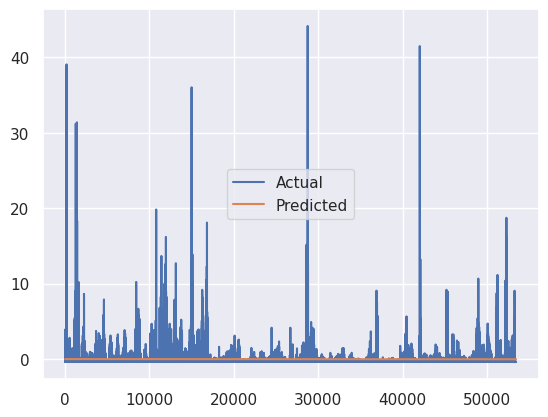

In [ ]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

#### LSTM model

In [ ]:
X_train=X_train.set_index("ds")
X_test=X_test.set_index("ds")
y_train=X_train.pop("y")
y_test=X_test.pop("y")

In [27]:
X_train["y"]=y_train
X_test["y"]=y_test

In [28]:
ypred=X_df_pred.pop("quantitySales")

In [30]:


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

train_ts = series_to_supervised(X_train, 7, 1)

test_ts = series_to_supervised(X_test, 7, 1) 

In [31]:
# split into input and outputs
train_X, train_y = train_ts.values[:, :-1], train_ts.values[:, -1]
test_X, test_y = test_ts.values[:, :-1], test_ts.values[:, -1]

In [32]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(189230, 1, 63) (189230,) (53453, 1, 63) (53453,)


In [33]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [ ]:
# design network : first architecture, overfitting in first exp
model = Sequential()
model.add(LSTM(50,return_sequences=True,  input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(Dense(25,activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam') 

Epoch 1/1000
5914/5914 [==============================] - 32s 5ms/step - loss: 0.5114 - val_loss: 1.2161
Epoch 2/1000
5914/5914 [==============================] - 28s 5ms/step - loss: 0.4514 - val_loss: 0.7476
Epoch 3/1000
5914/5914 [==============================] - 30s 5ms/step - loss: 0.4351 - val_loss: 0.7002
Epoch 4/1000
5914/5914 [==============================] - 27s 5ms/step - loss: 0.4320 - val_loss: 0.7752
Epoch 5/1000
5914/5914 [==============================] - 27s 5ms/step - loss: 0.4230 - val_loss: 0.9125
Epoch 6/1000
5914/5914 [==============================] - 27s 5ms/step - loss: 0.4261 - val_loss: 0.8139
Epoch 7/1000
5914/5914 [==============================] - 27s 5ms/step - loss: 0.4176 - val_loss: 0.8298
Epoch 8/1000
5914/5914 [==============================] - 27s 5ms/step - loss: 0.4134 - val_loss: 0.8523
Epoch 9/1000
5914/5914 [==============================] - 29s 5ms/step - loss: 0.4094 - val_loss: 0.8590
Epoch 10/1000
5914/5914 [==============================

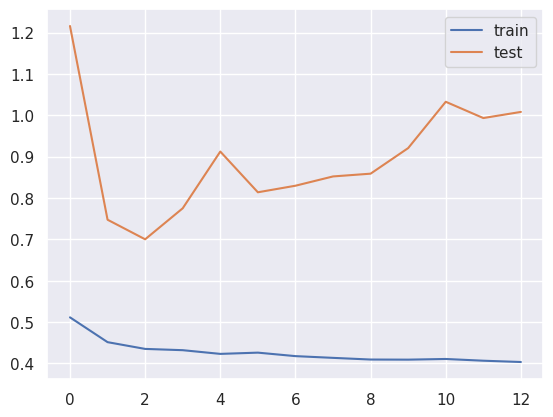

In [34]:
from keras.callbacks import EarlyStopping

# design network
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(25, activation='relu', activity_regularizer=regularizers.l2(1e-3)))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# add early stopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# fit network
history = model.fit(train_X, train_y, epochs=1000, batch_size=32, validation_data=(test_X, test_y), verbose=1, shuffle=False, callbacks=[es])
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

It's possible to tune the hyper parameters using tensorboard, we can do it as a perspective. For the nature of the task and the time limit we will skip this step. An example i developped that showcases hyperparameters in ANN tuning can be found on my github: https://github.com/AsmaZgo/ComputerVisionDigitsClassification

In [35]:
# make a prediction
yhat = model.predict(test_X)
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(test_y, yhat)
print('Test MSE: %.3f' % mse)

1671/1671 [==============================] - 5s 2ms/step
Test MSE: 1.004


The lstm still seems to be overfitting

### Training Conclusion
The Gradient Boosting regression model had the best performance metric.
It achieved:


```
Test error (mse): 0.4485433490040104
Test error (rmse): 0.6697337896537776
Test error (mae): 0.20840698087110385
```




Those hyper parameters were selected after a couple of trials : random_state=10,learning_rate=0.1,n_estimators=1000 , we didn't tune the hyperparameters using grid search and cross validation because of the time limit of this project.

**perspective :** using grid search cv to tune the hyperparameters.

#### model saving

saving the best model(gbr):

In [ ]:
from joblib import dump, load
dump(gbr, 'gbr_model.joblib')

['gbr_model.joblib']

saving the lstm model:

In [38]:
!pip install pyyaml h5py  # Required to save models in HDF5 format
!mkdir -p /content/drive/MyDrive/conrad_assignement/saved_model
model.save('/content/drive/MyDrive/conrad_assignement/saved_model/lstm_loss_mse')
import os
import tensorflow as tf

new_model = tf.keras.models.load_model('/content/drive/MyDrive/conrad_assignement/saved_model/lstm_loss_mse')
 
new_model.summary() 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             12288     
                                                                 
 dense (Dense)               (None, 1, 25)             825       
                                                                 
 dropout (Dropout)           (None, 1, 25)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                7424      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,570
Trainable params: 20,570
Non-trainable params: 0
_________________________________________________________________


### Prediction

In this section we predict the future sales using the method : Sliding window. A better model would be expanding windows but this method is more time consuming and for demo purposes we use the sliding window methodology.

In [ ]:
ypred=X_df_pred.pop("quantitySales")

In [ ]:
y_pred=gbr.predict(X_df_pred)

In [ ]:

#scaler.transform(X_df_pred)
k=y_pred.reshape(-1, 1)
y_pred=y_scaler.inverse_transform(k)
df_pred["quantitySales"]=y_pred
X_df_pred["quantitySales"]=y_pred

In [ ]:
df_pred[["productsGroup_key","date_key","quantitySales"]].to_csv('submission_single_point_prediction.csv', index=False)